In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data

In [2]:
train=pd.read_csv("C:\\Users\\user\\Downloads\\Google_Stock_Price_Train.csv")

# predict the stock for year 2017

In [3]:
train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
dataset_open = train['Open']
dataset_open

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [6]:
# i will consider my input and outpur variable from same column 
# i will be taking last few days data as input varailabe say last 60 observation are inputs.
#Input varilable 0 - 59  Output varilable : 60 
#                1 - 60                   : 61
#                2 - 61                   : 62
#               3 - 62                    :  63


In [5]:
# we are focus is only open column so we will consider only that column for stock analysis
train=train.iloc[:,1:2].values

In [6]:
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
train.ndim

2

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train=sc.fit_transform(train)

In [12]:
train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
# Creating empty list for xtrain and Ytrain

x_train=[]
y_train=[]

In [9]:
train.shape

(1258, 1)

In [10]:
for i in range(60,1258):
    x_train.append(train[i-60:i,:])
    y_train.append(train[i,:])

In [12]:
type(x_train)

list

In [13]:
x_train=np.array(x_train)

In [14]:
y_train=np.array(y_train)

In [15]:
x_train.shape # ( rows, input in each row ,column)

(1198, 60, 1)

In [24]:
y_train.shape

(1198, 1)

# Building NN Model

In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

# Init the NN model

In [17]:
model=Sequential()

In [27]:
#x_train.shape

In [18]:
# input_shape = num of independent variables 
# unit = number of output from Layers 
# Return Sequence will tell whether we are adding one more layer or not 
model.add(LSTM(return_sequences=True,input_shape=(x_train.shape[1],1),units=50))

In [ ]:
#LSTM have more chances of Overfitting 
# dropout layer will remove some neurons which are causing Overfitting problem


In [19]:
# if we have same context in cell then there is chances of Over fitting to so we have to remove that using Drop out 
# Drop out will remove some unwanted neurons 

model.add(Dropout(0.2))

In [20]:
# its hidden layer so we dont pass input shape and Adding the multiple Hidden layer

model.add(LSTM(return_sequences=True,units=50))
model.add(Dropout(0.2))

In [21]:
model.add(LSTM(return_sequences=True,units=50))
model.add(Dropout(0.2))

In [22]:
model.add(LSTM(return_sequences=False,units=50))
model.add(Dropout(0.2))

# Add Output layer

In [23]:
# we have to add activation function but data am adding here is related to regression model and if we user activatoin fucnction relu
# it will give only positive value but thats not correct way because am fine with out put negative also 

model.add(Dense(kernel_initializer="random_uniform",units=1))

# Compile the model

In [26]:
#binary cross entory for binary 
#for regression we will use LSE 
# optimizer tells method how to update the weights using Gradient Descent Method

model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mse"])

In [27]:
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 22s 101ms/step - loss: 315569.6835 - mse: 315569.6835
Epoch 2/50
38/38 [==============================] - 4s 113ms/step - loss: 309004.2821 - mse: 309004.2821
Epoch 3/50
38/38 [==============================] - 4s 113ms/step - loss: 316557.5841 - mse: 316557.5841
Epoch 4/50
38/38 [==============================] - 4s 111ms/step - loss: 311206.5489 - mse: 311206.5489
Epoch 5/50
38/38 [==============================] - 4s 119ms/step - loss: 308207.0064 - mse: 308207.0064 0s - loss: 308235.2467 - mse: 308235.246
Epoch 6/50
38/38 [==============================] - 4s 114ms/step - loss: 300031.9744 - mse: 300031.9744
Epoch 7/50
38/38 [==============================] - 6s 148ms/step - loss: 306003.1306 - mse: 306003.1306
Epoch 8/50
38/38 [==============================] - 5s 132ms/step - loss: 301630.3670 - mse: 301630.3670
Epoch 9/50
38/38 [==============================] - 4s 101ms/step - loss: 297611.7957 - mse: 297611.7957
Epoch 10/50
3

In [28]:
model

In [30]:
train_data=pd.read_csv("C:\\Users\\user\\Downloads\\Stock_Price_Train.csv")

In [31]:
test_data=pd.read_csv("C:\\Users\\user\\Downloads\\Google_Stock_Price_Test.csv")

In [32]:
dataset=pd.concat([train_data,test_data])

In [33]:
dataset

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"


In [34]:
len(dataset)-len(test_data)-60

1198

In [36]:
# last 60 values from train data and 20 from Test Data 

test=dataset.iloc[len(dataset)-len(test_data)-60:,:]

In [37]:
test

,Date,Open,High,Low,Close,Volume
1198,10/6/2016,779.00,780.48,775.54,776.86,"1,070,700"
1199,10/7/2016,779.66,779.66,770.75,775.08,"933,200"
1200,10/10/2016,777.71,789.38,775.87,785.94,"1,174,900"
1201,10/11/2016,786.66,792.28,780.58,783.07,"1,372,500"
1202,10/12/2016,783.76,788.13,782.06,786.14,"937,400"
...,...,...,...,...,...,...
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"


In [38]:
test=test["Open"].values

In [47]:
test.shape

(80,)

In [39]:
test=test.reshape(80,1)

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [44]:
test=sc.fit_transform(test)

In [46]:
x_test=[]
y_test=[]

In [47]:
for i in range(60,80):
    x_test.append(test[i-60:i,:])
    y_test.append(test[i,:])

In [48]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [51]:
x_test.shape

(20, 60, 1)

In [52]:
y_test.shape

(20, 1)

In [53]:
y_pred = model.predict(x_test)

In [54]:
y_pred

array([[95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.889  ],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.88899],
       [95.889  ]], dtype=float32)

In [55]:
y_test

array([[0.36708861],
       [0.46953443],
       [0.44507616],
       [0.54355289],
       [0.66305514],
       [0.67871701],
       [0.6480369 ],
       [0.67099335],
       [0.67464064],
       [0.67034971],
       [0.65672602],
       [0.64932418],
       [0.66852607],
       [0.67217335],
       [0.83361939],
       [0.91214332],
       [1.        ],
       [0.96674533],
       [0.75166273],
       [0.56071658]])

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
mean_squared_error(y_test,y_pred)

9065.703952590138

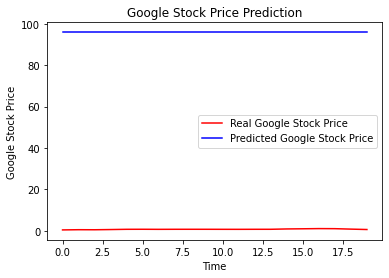

In [58]:
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()